In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('../radar_db')
c = conn.cursor()
c.execute("SELECT cod_ident_ato, data_assinatura_ato, link_texto_original, links  FROM Decretos")
decretos = c.fetchall()
conn.close()

In [2]:
d_vect = []
for d in decretos:
    date = d[1].split('/')
    date = [date[2], date[0], date[1]]    #represent dates in year_month_day format
    link = d[2]
    links = d[3]
    if(link != None):
        link = link.lower()
    if(links!= None):
        links = links.lower()
    d_aux = [d[0], link, links,int(''.join(date).replace('/', ''))]
    d_vect.append(d_aux)

In [3]:
d_df = pd.DataFrame(d_vect)
d_df.set_index(1, inplace = True)
d_df

,0,2,3
1,,,
http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2019/decreto/d10095.htm,DEC 10.095/2019,None,20191106
http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2019/decreto/d10093.htm,DEC 10.093/2019,http://www.planalto.gov.br/ccivil_03/_ato2015-...,20191106
http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2019/decreto/d10091.htm,DEC 10.091/2019,http://www.planalto.gov.br/ccivil_03/constitui...,20191106
http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2019/decreto/d10090.htm,DEC 10.090/2019,http://www.planalto.gov.br/ccivil_03/constitui...,20191106
http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2019/decreto/d10094.htm,DEC 10.094/2019,http://www.planalto.gov.br/ccivil_03/_ato2015-...,20191106
...,...,...,...
http://www.planalto.gov.br/ccivil_03/decreto/d3332.htm,DEC 3.332/2000,http://www.planalto.gov.br/ccivil_03/decreto/a...,20000111
http://www.planalto.gov.br/ccivil_03/decreto/d3337.htm,DEC 3.337/2000,None,20000113
http://www.planalto.gov.br/ccivil_03/decreto/d3328.htm,DEC 3.328/2000,http://www.planalto.gov.br/ccivil_03/decreto/2...,20000105


In [4]:
edges = []
print("Lista de links desconsiderados:")
print("Os links a seguir não puderam ser associados a nenhum decreto coletado.")
# Most of the links listed bellow are from other types of legal documents.
# In our analysis, we consider only the administrative decrees that we've collected (from 2000 to 2019).
for d in d_vect:
    source = d[1]
    links = []
    if(d[2] != None):
        links = d[2].split(",")
    links = [l.split('#')[0].strip(' ').replace('impressao', '').replace('impressão', '').replace('compilado', '') for l in links]
    for l in links:
        try:
            if (d_df.loc[source][3] >= d_df.loc[l][3]):
                edges.append([d_df.loc[source][0], d_df.loc[l][0]])
        except Exception as e:
            print(e)

Lista de links desconsiderados:
Os links a seguir não puderam ser associados a nenhum decreto coletado.
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13155.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9615consol.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13146.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13146.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13146.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12527.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1930-1949/d19899.htm'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1946/d22033.html'
'http://www.planalto.gov.br/ccivil_03/decreto/1950-1969/d36477.htm'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1955/d

'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0271.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2019/ret/dec10081-ret.doc'
'http://www.planalto.gov.br/ccivil_03/decreto/1930-1949/d23702.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1930-1949/d24548.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1950-1969/d47297.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1950-1969/d50872.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/historicos/dcm/dcm0020.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/historicos/dcm/dcm1106.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/historicos/dcm/dcm1164.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/historicos/dcm/dcm1203.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1950-1969/d54268.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1950-1969/d59033-a.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1950-1969/d61417.htm'
'http://www.pla

'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/dnn/dnn10577.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/dnn/dnn10606.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/dnn/dnn10612.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/dnn/dnn10613.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/dnn/dnn10659.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/dnn/dnn10675.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/dnn/dnn10686.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/dnn/dnn10704.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/dnn/dnn10710.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/dnn/dnn10716.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/dnn/dnn10751.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/dnn/dnn10756.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/dnn/dnn10766.htm'
'http://www.planalto.gov.

'http://www.planalto.gov.br/ccivil_03/leis/l9717.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2019/ret/dec10072-ret.doc'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/leis/1970-1979/l6687.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10480.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp73.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2019/lei/l13848.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2018/lei/l13675.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del2848.htm'
'http://www.planalto.gov.br/ccivil_03/

'http://www.planalto.gov.br/ccivil_03/decreto/d1800.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1800.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1800.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1800.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1800.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1800.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1800.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1800.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1800.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1800.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1800.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1800.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1800.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1800.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1800.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1800.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1800.htm'
'http://www.planalto.gov.br/cci

'http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2019/lei/l13898.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2019/decreto/anexo/and10168.pdf'
'http://www.planalto.gov.br/ccivil_03/leis/l6880.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6880.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6880.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6880.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6880.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13146.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13146.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13146.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12276.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12276.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2019/lei/l13885.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2019/lei/l13808.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del4657.htm

'http://www.planalto.gov.br/ccivil_03/leis/l8159.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9784.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d1799.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12187.htm'
'http://www.planalto.gov.br/ccivil_03/dnn/2003/dnn9922.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/dnn/dnn10133.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/dnn/dnn12867.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/dnn/dnn12867.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2019/lei/l13844.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2652.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12527.htm'
'http://www.planalto.gov.br/ccivil_03/dnn/anterior_a_2000/dnn07-07-99-2.htm'
'http://www.planalto.gov.br/ccivil_03/dnn/2003/dnn10001.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/dnn/dnn11821.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp95.

'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp95.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1930-1949/d423.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1930-1949/d1361.htm'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1937/d01396.html'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1937/d01397.html'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1937/d01398.html'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1938/d03232.html'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1938/d03233.html'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1938/d03342.html'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1938/d03343.html'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1948/d25696.html'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1953/d33196.html'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1954/d36378.html'
'http://www.planalto.gov.br/ccivil_03/de

'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2018/lei/l13648.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11326.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8918.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2018/lei/l13648.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp123.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2019/ret/dec10026-ret.doc'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13303.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12527.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp123.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp123.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9784.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/

'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d53706.htm'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1964/d53944.html'
'http://www.planalto.gov.br/ccivil_03/decreto/1950-1969/d54032.htm'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1965/d55786.html'
'http://www.planalto.gov.br/ccivil_03/decreto/1950-1969/d55871.htm'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1965/d56582.html'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1965/d56759.html'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1965/d56899.html'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1965/d57156.html'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1966/d57573.html'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1966/d57980.html'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1966/d58130.html'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1967/d60464.html'
'http://www.planalto.gov.br/ccivil_03/atos/decretos/1967/d61313.html'
'http://www.planalto.gov.br/

'http://www.planalto.gov.br/ccivil_03/leis/l9610.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9610.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9610.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d93872.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d93872.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8842.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.741.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12213.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1171.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2018/lei/l13675.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/lei/l13506.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-l

'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9807.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9491.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9491.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9491.htm'
'http://www.stf.jus.br/portal/peticaoinicial/verpeticaoinicial.asp?base=adin&s1=6121&processo=6121'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/lei/l12846.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1171.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.881.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp125.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7827.htm'
'http://www.planal

'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/dnn/dnn10906.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/dnn/dnn11503.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/dnn/dnn11503.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/dnn/dnn12015.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/dsn/dsn13267.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/dsn/dsn13318.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0073.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/1965-1988/del0261.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp109.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp126.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10480.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp73.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/cciv

'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8112cons.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2019/exm/exm-dec-9739-19.pdf'
'http://www.planalto.gov.br/ccivil_03/leis/l8112cons.htm'
'http://www.planalto.gov.br

'http://www.planalto.gov.br/ccivil_03/mpv/2220.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d88777.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8443.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13123.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13123.htm'
'http://www.planalto.gov.br/ccivi

'http://www.planalto.gov.br/ccivil_03/leis/l8213cons.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/dnn/dnn11710.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5966.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9933.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8036consol.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d99684.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7998.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8443.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9433.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9984.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/lei/l12608.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2220.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2220.htm'
'http://www.planalto.gov.br/c

'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11080.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8248.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8248.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8248.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2018/lei/l13755.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2018/lei/l13755.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9440.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9826.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1995/d1508.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12529.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2019/lei/l13848.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12529.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12529.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12529.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9625.htm'
'http://www.planalto.gov.br/cc

'http://www.planalto.gov.br/ccivil_03/decreto/d2295.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2295.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6880.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6880.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6880.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2018/lei/l13675.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7210.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2018/lei/l13675.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2018/lei/l13675.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4117.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1950-1969/d30816.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1950-1969/d64688.htm'
'http://www.planalto.gov.br/ccivil_03/dnn/anterior%20a%202000/1994/dnn2487.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4117.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constit

'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3000.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4506.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5172.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5172.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7713.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8383.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9250.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5172.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5172.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8134.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4506.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0401.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/1965-1988/del1301.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7713.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del5844.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5172.htm'
'http://www.planalto.go

'http://www.planalto.gov.br/ccivil_03/leis/l9250.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9250.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9250.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9250.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9250.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9250.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13105.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9250.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13105.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9250.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13105.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9250.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9250.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9250.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13105.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9250.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9250.htm'
'http:

'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5172.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5172.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9532.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5172.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9430.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9430.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9430.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9430.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9430.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9430.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9430.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9430.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9430.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9430.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9430.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9532.htm

'http://www.planalto.gov.br/ccivil_03/leis/l8218.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9430.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9532.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9532.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9532.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11033.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1598.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1598.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1598.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1598.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7450.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1598.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7450.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8383.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9430.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1598.htm'
'ht

'http://www.planalto.gov.br/ccivil_03/leis/l8313cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9249.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8313cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8685.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/lei/l12761.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/lei/l12761.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/lei/l12761.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/lei/l12761.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2014/lei/l12973.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2014/lei/l12973.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2014/lei/l12973.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2014/lei/l12973.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2014/lei/l12973.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2014/lei/l12973.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011

'http://www.planalto.gov.br/ccivil_03/leis/l4506.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4506.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1598.htm'
'http://www.planalto.gov.br/ccivil_03/leis/1950-1969/l4200.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4506.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4506.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9249.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/1965-1988/del2075.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/lei/l11196.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/lei/l11196.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/lei/l11196.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/lei/l11196.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/lei/l11196.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9249.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1598.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-le

'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2014/lei/l12973.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l11945.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l11941.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l11941.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/lei/l12715.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2014/lei/l13043.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9393.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9393.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9393.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9249.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8383.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9249.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8981.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9430.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9532.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9430.htm'
'http://www.planalto.g

'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/lei/l11196.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9069.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11434.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11434.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11434.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11434.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0368.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0368.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0368.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6938.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6938.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8212cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8212cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8137.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8846.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9069.htm'
'http:

'http://www.planalto.gov.br/ccivil_03/mpv/antigas_2001/2189-49.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9532.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11033.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11033.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11033.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9532.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11033.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10426.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10426.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11033.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10426.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8036consol.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2014/lei/l13043.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2014/lei/l13043.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/lei/l11196.htm'


'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12431.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12431.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12431.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12431.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12431.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12431.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12431.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12431.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12431.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12431.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12431.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12431.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12431.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014

'http://www.planalto.gov.br/ccivil_03/decreto-lei/1965-1988/del1967.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/1965-1988/del1968.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8981.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9249.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8981.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9532.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9532.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10426.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10426.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10426.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10426.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10426.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10426.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9779.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2158-35.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2158-35.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2158-35.htm'
'http

'http://www.planalto.gov.br/ccivil_03/decreto/1970-1979/d80572.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4132.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del3365.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del3365.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1930-1949/d27048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1930-1949/d27048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1980-1989/d90116.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1980-1989/d90116.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8745cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8213cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8745cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8745cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8745cons.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13146.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2

'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/lei/l13474.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9615consol.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12395.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/lei/l13474.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9615consol.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/lei/l13474.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9615consol.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9784.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9636.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9636.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del9760.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13334.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/mpv/mpv771.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/lei/l13474.htm'
'http://www.planalto.gov.b

'http://www.planalto.gov.br/ccivil_03/leis/l7210.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10593.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8112cons.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/mpv/mpv765.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/lei/l13464.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/mpv/mpv765.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4132.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del3365.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del3365.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del3365.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8069.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9807.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8069.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4132.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del3365.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del3365.htm'
'http://www.planalto.gov

'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/dsn/dsn14491.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/dsn/dsn14491.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10260.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2705.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2705.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9478.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9478.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9478.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2705.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9478.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9478.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2705.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2705.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2705.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/lei/l13465.htm'
'http://www.planalto.gov.br/cci

'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13303.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6385.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.973.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.973.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.973.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.973.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.973.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.973.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.973.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8212cons.htm'
'http://www.planalto.gov.br/cciv

'http://www.planalto.gov.br/ccivil_03/leis/l4320.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/lei/l13473.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/lei/l13473.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/lei/l13473.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/lei/l13473.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0200.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/lei/l13473.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4320.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp101.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/lei/l13473.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/lei/l13473.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/lei/l13473.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2

'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11326.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12512.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13334.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/decreto/d9212.htm.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2014/lei/l13005.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/ret/dec9205-ret.doc'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/lei/l13445.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/lei/l13445.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9474.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/lei/l13445.htm'
'http://www.

'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12305.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12305.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12305.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6938.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d40556.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d40556.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d40556.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d40556.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9434.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9434.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9434.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9434.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8080.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9434.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1997/d2268.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12187.htm'
'htt

'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1930-1949/d27048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1930-1949/d27048.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11046.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11046.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11046.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11046.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11539.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11356.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11356.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11356.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11356.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9657.htm'
'http://www.pla

'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13334.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/mpv/mpv752.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13334.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9394.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9394.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9394.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9394.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.861.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/ret/dec9057-ret.doc'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11356.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0200.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11356.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l

'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/lei/l12711.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/lei/l12711.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11648.htm'
''
''
''
''
''
''
''
''
''
''
''
''
''
''
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d715.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d715.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d715.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8069.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8242.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/ret/dec9023-ret.doc'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/decreto/d9026.htm.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6880.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/decreto/d9027.htm.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6880.htm'
'http://www.planalto.gov

'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2017/ret/dec8974rep.doc'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11516.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9985.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11284.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1990-1994/d99556.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10480.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10480.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp73.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/d8785.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/d8785.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1996/d2075.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1980-1989/d87054.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1996/d2075.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/dec

'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13341.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8443.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10233.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/lei/l11182.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10233.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/lei/l11182.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/lei/l12846.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12431.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10336.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10336.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/d8785.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13341.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/d8785.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/d8785.htm'
'http://www.planalto

'http://www.planalto.gov.br/ccivil_03/leis/l8727.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9491.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9096.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8727.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11437.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2157-5.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9961.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2156-5.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10186.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10184.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8313cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp129.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10420.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.836.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10420.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.836.htm'
'http://www.planalto.gov.br/ccivil

'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13303.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/dnn/dnn11710.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/d8785.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/d8785.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1154.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5172.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10451.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/ret/dec8950-ret.doc'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/anexo/and8950.pdf'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/ret/dec8950-ret.doc'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13152.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13

'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/lei/l12813.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.683.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13341.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/d8785.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/d8785.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/d8785.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9883.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9883.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13334.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/d8785.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/leis/1980-1988/l6871.htm'
'http://www.planalto.gov.

'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/d8785.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/mpv/mpv731.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8443.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/d8785.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/d8785.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/d8785.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/d8785.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13341.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1910-1929/d9620.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/historicos/dpl/dpl2380.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/historicos/dpl/dpl2380.htm'
'http://www.planalto.gov.br/ccivil_03/leis/1950-1969/l3960.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8080.htm'
'http://www.planal

'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13146.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8742.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13146.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13146.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8742.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12527.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12527.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d88777.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d88777.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d88777.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d88777.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d88777.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d88777.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d40556.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1970-1979/d79917.htm'
'http://www.planalto.gov.br/ccivil_03/constit

'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d86715.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13249.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13249.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13249.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13249.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13249.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13123.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13123.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13123.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13123.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13123.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13123.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13123.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/l

'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/lei/l13346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12431.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9445.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8443.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/lei/l12846.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0200.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0200.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0200.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0200.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0200.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8248.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1800.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9445.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9445.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9445.htm'
'http://www.planalto.gov.

'http://www.planalto.gov.br/ccivil_03%5c_ato2015-2018%5c2016%5cdecreto%5cd8700.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2015-2018%5c2016%5cdecreto%5cd8700.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2015-2018%5c2016%5cdecreto%5cd8700.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2015-2018%5c2016%5cdecreto%5cd8700.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2015-2018%5c2016%5cdecreto%5cd8700.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2015-2018%5c2016%5cdecreto%5cd8700.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2015-2018%5c2016%5cdecreto%5cd8700.htm'
'http://www.planalto.gov.br/d8670.htm'
'http://www.planalto.gov.br/d8670.htm'
'http://www.planalto.gov.br/d8670.htm'
'http://www.planalto.gov.br/leis/l9491.htm'
'http://www.planalto.gov.br/leis/l9069.htm'
'http://www.planalto.gov.br/leis/l8427.htm'
'http://www.planalto.gov.br/_ato2004-2006/2006/lei/l11437.htm'
'http://www.planalto.gov.br/mpv/2157-5.htm'
'http://www.planalto.gov.br/leis/l9961.htm'
'http://www.

'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11578.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11578.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2015-2018%5c2016%5cdecreto%5cd8740.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2015-2018%5c2016%5cdecreto%5cd8740.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2015-2018%5c2016%5cdecreto%5cd8740.htm'
'http://www.planalto.gov.br/_ato2019-2022/2019/decreto/d10086.htm'
'http://www.planalto.gov.br/_ato2019-2022/2019/decreto/d10086.htm'
'http://www.planalto.gov.br/_ato2004-2006/2005/decreto/d5598.htm'
'http://www.planalto.gov.br/_ato2004-2006/2005/decreto/d5598.htm'
'http://www.planalto.gov.br/_ato2011-2014/2014/lei/l13019.htm'
'http://www.planalto.gov.br/decreto-lei/del5452.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d84451.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3210.htm'
'http://www.planalto.gov.br/ccivil_0

'http://www.planalto.gov.br/d8784.htm'
'http://www.planalto.gov.br/d8824.htm'
'http://www.planalto.gov.br/d8864.htm'
'http://www.planalto.gov.br/d8919.htm'
'http://www.planalto.gov.br/d8941.htm'
'http://www.planalto.gov.br/d8700.htm'
'http://www.planalto.gov.br/d8784.htm'
'http://www.planalto.gov.br/d8919.htm'
'http://www.planalto.gov.br/d8676.htm'
'http://www.planalto.gov.br/d8700.htm'
'http://www.planalto.gov.br/d8784.htm'
'http://www.planalto.gov.br/d8784.htm'
'http://www.planalto.gov.br/d8864.htm'
'http://www.planalto.gov.br/d8919.htm'
'http://www.planalto.gov.br/d8941.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/ret/dec8668-ret.doc'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10559.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13170.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8078.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7210.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br

'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp121.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp121.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/lei/l12681.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10466.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13152.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8443.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'

'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'https://legislacao.planalto.gov.br/legisla/legislacao.nsf/viwtodos/4dbf40593a612298032569fa00673ba7?opendocument&highlight=1'
'diretriz para o estabelecimento de estrutura militar'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/decreto/d8497.htm.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6932.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/lei/l12871.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8080.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8080.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6932.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6932.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/lei/l12871.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/lei/l12871.htm'
'http://www.planalto.gov.br/ccivil_03/_ato

'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2014/lei/l12952.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13115.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2014/lei/l12952.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2014/lei/l12952.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2158-35.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2158-35.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/decreto/d8450.htm.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9491.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9491.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9491.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1950-1969/d30691.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1950-1969/d30691.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1950-1969/d30691.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1950-1969/d30691.htm'
'http://www.pla

'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/decreto/d8404.htm.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d93872.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d93872.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d93872.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d93872.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/dsn/dsn14128.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d93872.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d93872.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d93872.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d93872.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d88777.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d88777.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12527.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/20

'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2014/ret/dec8315ret.doc'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2014/lei/l13027.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9430.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'htt

'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp73.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp73.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10480.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8958.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8958.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8958.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8958.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8958.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8958.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12101.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12101.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12101.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp123.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/lei/l12868.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/lei/l12868.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12101.htm'
'ht

'http://www.planalto.gov.br/ccivil_03/leis/l5645.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10484.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/lei/l11090.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11344.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11357.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11784.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12277.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11578.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11578.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/lei/l12798.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2014/lei/l12952.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/decreto/d6412.htm.'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/decreto/d6412.htm.'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/decreto/d6412.htm.

'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12382.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9867.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9867.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/decreto/d8158.htm.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10410.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8112cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8112cons.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/decreto/anexo/and8159-13.doc'
'http://www.planalto.gov.br/ccivil_03/decreto/d2346.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2346.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11578.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/lei/l12847.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12527.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1171.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12527.htm'
'http://www.p

'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/lei/l12598.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/lei/l12598.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp123.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10637.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10637.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.865.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/lei/l12598.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12513.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11578.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8842.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.741.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/decreto/'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/decreto/'
'http://www

'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d52795.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d52795.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d52795.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d52795.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d52795.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d52795.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d52795.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d52795.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d52795.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2615.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2615.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9491.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9491.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1995/d1602.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1995/d1602.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/ret

'http://www.planalto.gov.br/ccivil_03/leis/2002/l10559.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11326.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12340.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/ret/dex8026-ret.doc'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/ret/dex8026-ret.doc'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12462.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12462.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12462.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12462.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12462.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7920.htm'
'http://legislacao.planalto.gov.br/legisla/legislacao.nsf/viw_identificacao/lei%209.430-1996?opendocument'
'http://legislacao.planalto.gov.br/legisla/legislacao.nsf/viw_identificacao/lei%209.430-1996?opendocument'
'http

'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11578.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11578.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12462.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/lei/l12715.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12101.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9637.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9790.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12101.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12101.htm'


'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.836.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/lei/l12708.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11578.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11578.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10420.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/mpv/mpv610.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/mpv/mpv610.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/ret/dex7973-ret.doc'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/ret/dex7973-ret.doc'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0759.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9613.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404

'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.931.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9491.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9491.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/decreto/d7894.htm.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10520.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10520.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10520.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://ww

'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11578.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11578.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d2122.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d2122.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d2122.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d2122.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10559.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/1937-1946/del1315.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/1937-1946/del1544.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/1937-1946/del3649.htm'
'http://www.planalto.gov.br/ccivil_03/leis/1930-1949/l288.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5315.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8059.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10559.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.pla

'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/lei/l12715.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/dnn/dnn11578.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp123.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9074cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9074cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9074cons.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/mpv/579.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/mpv/579.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/mpv/579.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/mpv/579.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/mpv/579.htm'
'http://www.planalto.gov.br/ccivil_03

'http://www.planalto.gov.br/ccivil_03/leis/l8029cons.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1990-1994/d0519.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1990-1994/d0520.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10480.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp73.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11578.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11578.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12465.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12087.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9650.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/decreto/'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/decreto/'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/decreto/'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/decreto/'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/decreto/'
'http://w

'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/decreto/d7693.htm.htm'
'http://www.planalto.gov.br/ccivil_03/leis/1970-1979/l6687.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10480.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp73.htm'
'http://www.planalto.gov.br/ccivil_03/leis/1970-1979/l6687.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.871.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.871.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.871.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.871.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.871.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1990-1994/d0524.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8405.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11502.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12443.htm'
'http://www.planalto.gov.br/ccivil_03

'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12382.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7210.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7210.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7210.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del2848.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1001.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11343.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11343.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11343.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8072.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8930.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9695.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11464.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12015.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11357.htm'
'http://www.planalto.gov.br/ccivil_03/_

'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d70235cons.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d70235cons.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/lei/l11196.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d70235cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4862.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d70235cons.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d70235cons.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d70235cons.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d70235cons.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d70235cons.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d70235cons.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d70235cons.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d70235cons.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d70235cons.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d70235cons.htm

'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12409.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1970-1979/d80281.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1970-1979/d80281.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1970-1979/d80281.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1970-1979/d80281.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1980-1989/d91364.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12396.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12396.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12396.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6880.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12396.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/decreto/d7551.htm.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/mpv/540.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12546.htm'
'http://www.planal

'http://www.planalto.gov.br/ccivil_03/leis/l5768.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12529.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5768.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/1937-1946/del6259.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/1965-1988/del0204.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7291.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6704.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6704.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6704.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11281.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d73115.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d73115.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4595.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp24.htm'
'h

'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.972.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12214.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2673.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12305.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11445.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/lei/l11107.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9795.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12305.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12305.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12305.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12305.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12305.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12305.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12305.htm'
'http://www.

'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12274.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12274.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12274.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5648.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9279.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/lei/l12274.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5648.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9279.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp73.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9279.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10196.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9279.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9279.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9279.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11484.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9609.htm'
'http://www.planalto.gov.b

'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/lei/l11091.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11892.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9632.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp101.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp101.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp101.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9394.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/lei/l11091.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2007-2010%5c2010%5cdecreto%5cd7308.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2007-2010%5c2010%5cdecreto%5cd7308.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2007-2010%5c2010%5cdecreto%5cd7308.htm'
'http://www.planalto.gov.br/_ato2019-2022/2019/decreto/d10086.htm'
'http://www.planalto.gov.br/_ato2019-2022/2019/decreto/d10086.htm'
'http://www.planalto.gov.br/2009/decreto/d6944.htm'
'http://www.planalto.gov.br/2009/decreto/d6944.htm'
'http:

'http://www.planalto.gov.br/ccivil_03/decreto/d71733.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d0757.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12101.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12101.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12101.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12101.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12101.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12101.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12101.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12101.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12101.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12101.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp123.htm'
'http://www.planalto.gov.br

'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12158.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12158.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12158.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12158.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12158.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12158.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12158.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12158.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12158.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12158.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12158.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12158.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12158.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010

'http://www.planalto.gov.br/ccivil_03/leis/l8112cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8112cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp73.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2018/mpv/mpv830.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11887.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11887.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11887.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11887.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11887.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11887.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11887.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11887.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11887.htm'
'http://www.planalto.gov.br

'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11897.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/decreto/anexo/and7035.doc'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l12096.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2007-2010%5c2009%5cdecreto%5cd7026.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2007-2010%5c2009%5cdecreto%5cd7026.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2007-2010%5c2009%5cdecreto%5cd7026.htm'
'http://www.planalto.gov.br/_ato2019-2022/2019/decreto/d10086.htm'
'http://www.planalto.gov.br/_ato2019-2022/2019/decreto/d10086.htm'
'http://www.planalto.gov.br/d6827.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.683.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l11959.htm'
'htt

'http://www.planalto.gov.br/ccivil_03/decreto/1930-1949/d24548.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1930-1949/d24548.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1930-1949/d24548.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1930-1949/d24114.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1930-1949/d24114.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1930-1949/d24114.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1930-1949/d24114.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1930-1949/d24114.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8212cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8212cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8212cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8212cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9639.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5172.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp101.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/

'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d83934.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d92638.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/decreto/d6937.htm.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11671.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11671.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2007-2010%5c2009%5cdecreto%5cd6930.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2007-2010%5c2009%5cdecreto%5cd6930.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2007-2010%5c2009%5cdecreto%5cd6930.htm'
'http://www.planalto.gov.br/_ato2019-2022/2019/decreto/d10086.htm'
'http://www.planalto.gov.br/_ato2019-2022/2019/decreto/d10086.htm'
'http://www.planalto.gov.br/decreto/2003/d4923.htm'
'http://www.planalto.gov.br/decreto/2003/d4923.htm'
'http://www.planalto.gov.br/decreto/2003/d4923.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6533.htm'
'http://www.planalto.gov.br/ccivil_03/leis/200

'http://www.planalto.gov.br/ccivil_03/leis/l7565.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1002.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/lei/l11182.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d1351-94.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11079.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/mpv/459.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1950-1969/d44045.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1950-1969/d44045.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1950-1969/d44045.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/mpv/459.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/mpv/459.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/mpv/459.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/mpv/459.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/mpv/459.htm'
'http://www.planalto.gov.br/ccivil_03/_ato200

'http://www.planalto.gov.br/ccivil_03/decreto/1995/d1765.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del2120.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1995/d1765.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l11898.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l11898.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l11898.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l11898.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l11898.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l11898.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/1965-1988/del1418.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/1965-1988/del1418.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/1965-1988/del1418.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0037.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0037.htm'
'http://www.planalto.gov.br/cc

'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1578.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1578.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1578.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1578.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1578.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1578.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1578.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1578.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1578.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1578.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1578.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1578.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1578.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del2295.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9362.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9362.htm'
'http://ww

'file:///t:/ccivil_03/leis/l8032.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11732.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11732.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l11945.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l11945.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l11945.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10637.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.865.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l11945.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l11945.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l11945.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l11945.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2009/lei/l11945.htm'
'http://www.planalto.gov.br/ccivil_03

'file:///t:/ccivil_03/decreto/1995/d1765.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0037.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1578.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10357.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10357.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10357.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10357.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11343.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11343.htm'
'file:///t:/ccivil_03/leis/l9532.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1593.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1593.htm'
'file:///t:/ccivil_03/leis/l9532.htm'
'file:///t:/ccivil_03/leis/l9532.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0399.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1593.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del159

'file:///t:/ccivil_03/leis/2003/l10.833.htm'
'file:///t:/ccivil_03/leis/2003/l10.833.htm'
'file:///t:/ccivil_03/leis/2003/l10.833.htm'
'file:///t:/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0037.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0037.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0037.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.

'http://www.planalto.gov.br/ccivil_03/leis/l8405.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.861.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10304.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9985.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11284.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6015consolidado.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0271.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10267.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1980-1989/d87054.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1996/d2075.htm'
'http://www.aladi.org/nsfaladi/textacdos.nsf/5e800d33de11b31203256a65006bcdd4/68157aaf958dd2a803256a7e00683331?opendocument'
'http://www.planalto.gov.br/ccivil_03/decreto/1996/d2075.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/cciv

'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11652.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1980-1989/d87054.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d0550.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8032.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8402.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8032.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8402.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0037.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8032.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8402.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/1965-1988/del1804.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/1965-1988/del1804.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www

'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11524.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11524.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11524.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11524.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11524.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11524.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11524.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11524.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11524.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11524.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11524.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11524.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d60459.ht

'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1980-1989/d87054.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d0550.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.711.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2341.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11440.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11440.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11292.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11440.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/ret/retdec6563-08.doc'
'http://www.planalto.gov.br/ccivil_03/leis/1980-1988/l6871.htm'
'http://www.planalto.gov.br/ccivil_03/leis/1989_1994/l8140.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp73.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2

'http://www.planalto.gov.br/ccivil_03/leis/l9605.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8005.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8005.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8005.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8005.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9784.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8005.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9605.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9605.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9605.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2020/decreto/d10198.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6938.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9605.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9784.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3179.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11653.htm'
'http://www.planalto.gov.br/ccivi

'http://www.planalto.gov.br/ccivil_03/decreto/d71733.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d71733.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/ret/retdec6409-08.doc'
'http://www.planalto.gov.br/ccivil_03/decreto/d71733.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d71733.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d71733.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d71733.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d71733.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d71733.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d71733.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d71733.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9883.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp73.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8213cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8213cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/

'http://www.planalto.gov.br/ccivil_03/leis/l8742.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8742.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8742.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8742.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8313compilada.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11438.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6385.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11438.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8313cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8685.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1089.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9430.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8313cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8313cons.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11438.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11437.htm'
'http://www.planalto.gov.br/cc

'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/lei/l11196.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5172.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8894.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1783.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8894.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1783.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8894.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8894.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8894.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1783.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2158-35.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9779.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2158-35.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8894.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8894.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11795.htm'
'http://w

'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp73.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12527.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1990-1994/d0941.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8112cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8216.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8270.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.973.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.973.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.973.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/lei/l11196.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/lei/l11196.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9249.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.973.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.973.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9491.htm'
'http://www.

'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13146.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10406.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8742.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8742.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8742.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8742.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9784.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8742.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13146.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13146.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8742.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8742.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12527.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2011/lei/l12527.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8742.htm'
'http://www.planalto.gov.br/cciv

'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d0825.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d93872.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d93872.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d97916.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/ret/retdec6170.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6880.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8213cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8213cons.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/mpv/373.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/mpv/373.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/mpv/373.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/mpv/373.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/mpv/373.htm'
'http://www.planalto.gov.br/ccivil_03/_a

'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/ret/retdec6188-07.doc'
'http://www.planalto.gov.br/ccivil_03/leis/l6880.htm'
'http://www.planalto.gov.br/ccivil_03/dnn/anterior%20a%202000/1995/dnn3362.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11457.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.910.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/ret/retdec6131.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9430.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11439.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2007-2010%5c2007%5cdecreto%5cd6125.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2007-2010%5c2007%5cdecreto%5cd6125.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2007-2010%5c2007%5cdecreto%5cd6125.htm'
'http://www.planalto.gov.br/_ato2019-2022/2019/decreto/d10086.htm'
'http://www.planalto.gov.br/_ato2019-2022/2019/decreto/d10086.htm'
'http://www.planalto.gov.br/decreto/2003/d4734.ht

'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/dnn/dnn10884.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9998.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9998.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9472.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9472.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/emendas/emc/emc19.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/emendas/emc/emc38.htm'
'http://www.planalto.gov.br/ccivil_03/dnn/2000/dnn0003-10.05.2000.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11451.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11439.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/lei/l11439.

'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/ret/retdec6006-06.doc'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/ret/retdec6006-06_1.doc'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/decreto/anexos/and6006/sumario.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/decreto/anexos/and6006/secaoi.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/decreto/anexos/and6006/secaoii.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/decreto/anexos/and6006/secaoiii.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/decreto/anexos/and6006/secaoiv.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/decreto/anexos/and6006/secaov.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/decreto/anexos/and6006/secaovi.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/decreto/anexos/and6006/secaovii.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/decreto/anexos/and6006/secaoviii.htm'

'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d0550.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.741.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.741.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9074cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10233.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10233.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d0550.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2006/decreto/d5928.htm.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/dnn/anterior%20a%202000/1991

'http://www.planalto.gov.br/ccivil_03%5c_ato2004-2006%5c2006%5cdecreto%5cd5861.htm'
'http://www.planalto.gov.br/2005/lei/l11178.htm'
'http://www.planalto.gov.br/d5780.htm'
'http://www.planalto.gov.br/d5925.htm'
'http://www.planalto.gov.br/d5780.htm'
'http://www.planalto.gov.br/d5925.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d99684.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d99684.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6019.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8036consol.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d99684.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d99684.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8742.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d40556.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2004-2006%5c2006%5cdecreto%5cd5854.htm'
'http://www.planalto.go

'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.861.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9784.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.870.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9394.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11892.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2008/lei/l11892.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9394.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9394.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9394.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9394.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9394.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.861.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.861.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.861.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8112cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9784

'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.934.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.934.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11046.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11046.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11046.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11046.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11046.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11046.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11046.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11046.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1990-1994/d99217.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.934.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2005/lei/l11196.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2

'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/cci

'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp73.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del1437.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11079.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp101.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11079.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8884.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8884.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9021.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l10149.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5768consol.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d70951.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/1965-1988/del0204.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7291.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d73115.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4595.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.pla

'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10188.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10188.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10188.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9292.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d1091.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9292.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9491.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4118.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6189.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7781.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/1965-1988/del2464.htm'
'http://www.planalto.gov.br/ccivil

'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11079.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11079.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9074cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8987cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8987cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8112cons.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l11079.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1526.htm'
'http://legislacao.planalto.gov.br/legisla/legislacao.nsf/viw_identificacao/dec%2098.479-1989?opendocument'
'http://legislacao.planalto.gov.br/legisla/legislacao.nsf/viw_identificacao/dec%201.203-1994?opendocument'
'http://www.planalto.gov.br/ccivil_03/decreto/d2956.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6938.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7661.h

'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d74170.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d74170.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8884.htm'
'http://legislacao.planalto.gov.br/legisla/legislacao.nsf/viw_identificacao/lei%204.137-1962?opendocument'
'http://www.planalto.gov.br/ccivil_03/leis/l8884.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8884.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8884.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp73.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8884.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8884.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8884.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.891.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.891.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9784.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d1145.htm'
'http://legislacao.planalto.gov.br/legisla/legislacao.nsf/

'http://www.planalto.gov.br/ccivil_03/decreto/d2655.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11473.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11473.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del3689.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8162.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2007/lei/l11473.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9028.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10201.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10201.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10201.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10201.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/mpv/212.htm'
'http://www.plan

'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.836.htm$art2§12iii'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.836.htm$art2§12iii'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.836.htm$art2§12iii'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.836.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.836.htm$art2§12ii'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.836.htm$art2§12ii'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.836.htm$art2§12i'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.836.htm$art2§12iii'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.836.htm$art2§12i'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.836.htm$art2§12ii'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.836.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.836.htm'
'http://www.planalto

'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d40556.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/mpv/197.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9807.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3087.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3087.htm'
'http://www.planalto.gov.br/ccivil_03/leis/1950-1969/l4319.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3298.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8242.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9074cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9074cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9074cons.htm'
'http://www.planalto.gov.br/ccivil

''
''
'http://www.planalto.gov.br/ccivil_03/dnn/anterior%20a%202000/dnn-18-10-99.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/decreto/d5127.htm.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/decreto/anexos/anexodec5127-04.doc'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/mpv/190.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.823.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp101.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d2406.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.826.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.826.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.826.htm'
'http://www.planalto.gov.br

'http://www.planalto.gov.br/ccivil_03/leis/l8036consol.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8036consol.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8036consol.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/ret/retdec5113.doc'
'http://www.planalto.gov.br/ccivil_03/decreto/1990-1994/d194.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1990-1994/d194.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3277.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3277.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3277.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2799.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2004-2006%5c2004%5cdecreto%5cd5102.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2004-2006%5c2004%5cdecreto%5cd5102.htm'
'http://www.planalto.gov.br/ccivil_03%5c_ato2004-2006%5c2004%5cdecreto%5cd5102.htm'
'http://www.planalto.gov.br/_ato2019-2022/2019/decreto/d10086.

'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/ret/retdec5069-04.pdf'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.833.htm'
'http

'http://www.planalto.gov.br/ccivil_03/leis/l6880.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6880.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp101.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.837.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.707.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2169-43.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2225-45.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4320.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.707.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.707.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp101.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.707.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.836.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2004-2006/2004/lei/l10.836.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8142.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8142.htm'
'http://www.planalto.gov.br/ccivil_0

'http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2014/lei/l13001.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp93.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp93.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp93.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp93.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp93.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/2003/ret/retdec4892-03.doc'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.683.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2958.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2958.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2958.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2958.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2958.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2958.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/2003/ret/retdec4889-03.pdf'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.678.htm'
'http://www.planalto.gov.

'http://www.planalto.gov.br/ccivil_03/leis/2002/l10524.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10612.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10604.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10604.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10453.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp110.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10633.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10524.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1590.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8242.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d0408.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d0408.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3038.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3201.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3201.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3201.htm'

'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.683.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8029cons.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp73.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048consol.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3048.htm'
'http:/

'http://www.planalto.gov.br/ccivil_03/mpv/103.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8078.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp109.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp109.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2774.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1996/d2075.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5172.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10480.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8216.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8216.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2079.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.640.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/antigas_2003/103.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2982.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d62724.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d62724.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10438a.htm'
'htt

'http://www.planalto.gov.br/ccivil_03/decreto/2003/d4858a.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2228-1.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/2002/d4121a.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7827.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3130.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3132.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0079.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0079.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10524.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10524.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/2003/d4597.htm.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3179.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3179.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2020/decreto/d10223.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2020/decreto/d10223.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3267.htm'
'http://www.pla

'http://legislacao.planalto.gov.br/legisla/legislacao.nsf/viw_identificacao/dec%2090.174-1984?opendocument'
'http://www.planalto.gov.br/ccivil_03/decreto/d2655.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5899.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10438a.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2655.htm'
'http://legislacao.planalto.gov.br/legisla/legislacao.nsf/viw_identificacao/dec%2076.893-1975?opendocument'
'http://www.planalto.gov.br/ccivil_03/leis/l9648cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8987cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5899.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5899.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5899.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10438a.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10438a.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2655.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2217-3.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2

'http://www.planalto.gov.br/ccivil_03/leis/l6729.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9715.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/antigas_2002/66.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/antigas_2002/66.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9514.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9990.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l10147.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10485.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l10147.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7347orig.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10213.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10213.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l10147.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9069.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l10147.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10213.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/antigas_2002/66.htm'
'http://

'http://www.planalto.gov.br/ccivil_03/decreto/2002/d4503.htm.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4117.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8731.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8948.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9784.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9784.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4375.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6880.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5821.htm'
'http://www.planalto.gov.br/ccivil_03/leis/1950-1969/l5292.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1997/d2354.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2134.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10539.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5809.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9649cons.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2200-2.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp73.htm'
'http://www.planalto.gov.br/ccivil_

'http://www.planalto.gov.br/ccivil_03/mpv/2228-1.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/2002/d4121a.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8685.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10454.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8313cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8313cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8685.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8313cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8313cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8685.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8685.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8313cons.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2228-1.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8685.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8313cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8313cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8685.htm'
'http://www.planalto.gov.br/ccivil_03/l

'http://www.planalto.gov.br/ccivil_03/leis/l10165.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6938.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l10165.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4771.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7511.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7803.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4771.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2166-67.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4771.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2166-67.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9985.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4771.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2166-67.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9393.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9393.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l3071.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9393.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9393.htm'
'http://www.planalto.go

'http://www.planalto.gov.br/ccivil_03/leis/l9985.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9985.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9985.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9985.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9985.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/2002/d4342.htm.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10520.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/2002/ret/retdec4342.doc'
'http://www.planalto.gov.br/ccivil_03/_ato2007-2010/2010/dnn/dnn12867.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2519.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6938.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/2002/d4337.htm.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/61.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/

'http://www.planalto.gov.br/ccivil_03/leis/2002/l10432.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d0726.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/historicos/dpl/dpl4492.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d96671.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/2002/d4261a.htm'
'http://www.planalto.gov.br/ccivil_03/resolução/2002/res125-02.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8884.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d1952.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituiçao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2971.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3065.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/2002/ret/retdec4259.pdf'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d91030.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d91030.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8213cons.htm'
'http://www.planalto.gov.br/ccivil_03/_at

'http://www.planalto.gov.br/ccivil_03/leis/l10168.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10332.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10332.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10332.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8661.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l10168.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l10168.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9841.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9532.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10332.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10176.htm'
'http://www.planalto.gov.br/ccivil_03/dnn/2000/dnn8919.htm'
'http://www.planalto.gov.br/ccivil_03/dnn/2000/dnn8920.htm'
'http://www.planalto.gov.br/ccivil_03/dnn/2000/dnn8918.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d0550.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9140.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2228-1.

'http://www.planalto.gov.br/ccivil_03/decreto/d2848.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3074.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8313cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8685.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2228-1.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2228-1.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3277.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3277.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3277.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3277.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3277.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3277.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2335.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d88419.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d88419.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/18.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10336.htm'
'http://www.planalto

'http://www.planalto.gov.br/ccivil_03/decreto/2001/d3746.htmanexo10'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp101.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp87.htm'
'http://www.planalto.gov.br/ccivil_03/constituicao/constituicao.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/2001/d4045.htm.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10213.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4320.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3034.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3034.htm'
'http://www.planalto.gov.br/ccivil_03/_ato2019-2022/2020/decreto/d10236.htm'
'http://www.planalto.gov.br/ccivil_03/mpv/2177-44.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9649cons.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d71733.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d0550.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/2001/d4043.htm.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1840.htm'
'http://ww

'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10225.htm'
'http://www.planalto.gov.br/ccivil_03/leis/leis_2001/l10225.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1451.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2154.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4516.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5615.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5615.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9292.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9292.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d84410.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d1351-94.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l4229.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l5508.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9433.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9433.htm'
'http://www.planalto.gov.br/ccivil_03/leis/lcp/lcp73.htm'
'http://www.planal

'http://www.planalto.gov.br/ccivil_03/decreto/d2369.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2877.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/2001/d3931htm.htm.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2002/l10520.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2743.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/2001/d3930.htm.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2954.ht

'http://www.planalto.gov.br/ccivil_03/leis/l9292.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d1091.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9292.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/dnn/2002/dnn9770.htm'
'http://www.planalto.gov.br/ccivil_03/dnn/2000/dnn0003-10.05.2000.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3138.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/2001/d3847.htm.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3176.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9649cons.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2943.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del0759.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6404consol.htm'
'http://www.planalto.gov.br/ccivil_03/

'http://www.planalto.gov.br/ccivil_03/leis/l9636.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del9760.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del9760.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9636.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9636.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/1965-1988/del2398.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9636.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8666cons.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d1094.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d81240.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d81240.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d81240.htm'
'http://www.planalto.gov.br/ccivil_03%5cdecreto%5c2001%5cd3714.htm'
'http://www.planalto.gov.br/ccivil_03%5cdecreto%5c2001%5cd3714.htm'
'http://www.planalto.gov.br/ccivil_03%5cdecreto%5c2001%5cd3714.htm'
'h

'http://www.planalto.gov.br/ccivil_03/decreto/1996/d1797.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1996/d1797.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d98973.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9784.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/anexos/d3665anexoi.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/anexos/d3665anexoii.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/anexos/d3665anexoiii.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/anexos/d3665anexoiv.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/anexos/d3665anexov.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/anexos/d3665anexovi.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/anexos/d3665anexovii.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/anexos/d3665anexoviii.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/anexos/d3665anexoix.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/anexos/d3665anexox.htm'
'http://www.planalto.gov.br/ccivil_03/decreto

'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.683.htm'
'http://www.planalto.gov.br/ccivil_03/leis/2003/l10.683.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2809.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2809.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3061.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2687.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del2452.htm'
'http://www.planalto.gov.br/ccivil_03/decreto-lei/del2452.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8396.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8924.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9784.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1995/d1679.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1980-1989/d92512.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1980-1989/d92512.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3276.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d1711.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l8248.h

'http://www.planalto.gov.br/ccivil_03/decreto/1990-1994/d1264.htm'
'http://legislacao.planalto.gov.br/legisla/legislacao.nsf/viw_identificacao/dec%201.484-1995?opendocument'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d99438.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2477.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2922.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2890.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3280.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d1351-94.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2637.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2637.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l7798.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2705.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2705.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1996/d1919.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3271.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3096.htm'
'http:

'http://www.planalto.gov.br/ccivil_03/decreto/d96759.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d96759.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d96759.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d96759.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1995/d1757.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3178.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l6880.htm'
'http://www.planalto.gov.br/ccivil_03/leis/l9491.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1980-1989/1985-1987/d93990.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1990-1994/d1289.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3263.htm'
'http://www.planalto.gov.br/ccivil_03/dnn/anterior%20a%202000/1998/dnn6443.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2936.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3129.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3129.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3129.htm'
'http://www.planalto.gov.br/cci

'http://www.planalto.gov.br/ccivil_03/decreto/d2914.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3165.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3307.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d715.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d715.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1990-1994/d1120.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d3284.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2390.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2390.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2390.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2390.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2390.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d2390.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/antigos/d99656.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/d83740.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/1996/d1888.htm'
'http://www.planalto.gov.br/ccivil_03/decreto/199

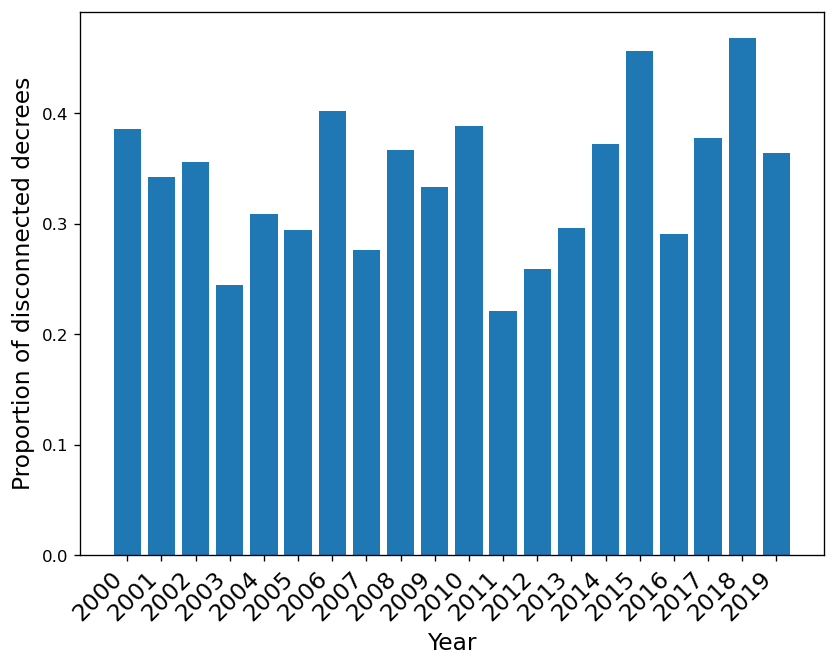

In [5]:
from matplotlib import pyplot as plt
import numpy as np

linked_nodes = set()
full_nodes = set(d_df[0])
isolated_nodes = set()
for e in edges:
    if(e[0] != e[1]):
        linked_nodes.add(e[0])
        linked_nodes.add(e[1])

for n in full_nodes:
    if n not in linked_nodes:
        isolated_nodes.add(n)

aged_decrees_pd = pd.DataFrame()
aged_decrees_pd[0] = d_df[0]
aged_decrees_pd[1] = d_df[3]
aged_decrees_pd[2] = d_df.index
aged_decrees_pd.set_index(0, inplace=True)


isolated_nodes_age = []
isolated_nodes_links =[]
full_nodes_age = []
for n in isolated_nodes:
    isolated_nodes_age.append(int(str(aged_decrees_pd.loc[n][1])[0:4]))
    isolated_nodes_links.append(aged_decrees_pd.loc[n][2])

for n in full_nodes:
    full_nodes_age.append(int(str(aged_decrees_pd.loc[n][1])[0:4]))
    
full_distribution = np.histogram(full_nodes_age, bins=20)
isolated_distribution = np.histogram(isolated_nodes_age, bins=20)
relative_isolated = isolated_distribution[0]/full_distribution[0]

plt.figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
x_ticks = list(range(2000, 2020))
plt.xticks(x_ticks, x_ticks, rotation='vertical', fontsize=14)
plt.bar(x_ticks, relative_isolated)
plt.ylabel("Proportion of disconnected decrees", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Year", fontsize=14)
plt.show()

In [6]:
links_isolated = pd.DataFrame()
links_isolated['ano'] = isolated_nodes_age
links_isolated['link'] = isolated_nodes_links
links_isolated.to_csv("isolated_links.txt", sep=' ', index=None)
links_isolated

,ano,link
0,2006,http://www.planalto.gov.br/ccivil_03/_ato2004-...
1,2001,http://www.planalto.gov.br/ccivil_03/decreto/2...
2,2011,http://www.planalto.gov.br/ccivil_03/_ato2011-...
3,2001,http://www.planalto.gov.br/ccivil_03/decreto/2...
4,2002,http://www.planalto.gov.br/ccivil_03/decreto/2...
...,...,...
2217,2018,http://www.planalto.gov.br/ccivil_03/_ato2015-...
2218,2019,http://www.planalto.gov.br/ccivil_03/_ato2019-...
2219,2005,http://www.planalto.gov.br/ccivil_03/_ato2004-...
2220,2003,http://www.planalto.gov.br/ccivil_03/decreto/2...


In [17]:
import networkx as nx
g = nx.DiGraph()
for e in edges:
    if(e[0] != e[1]):
        g.add_edge(e[0], e[1])

In [50]:
print("Number of nodes:", g.number_of_nodes())
print("Number of edges:", g.number_of_edges())
print("Average degree:", g.number_of_edges() / g.number_of_nodes())
print("Average clustering:", nx.average_clustering(g))
print(nx.degree_assortativity_coefficient(g))
print()
# print(nx.diameter(g, usebounds=True))

largest_cc = max(nx.weakly_connected_components(g), key=len)
cc = g.subgraph(largest_cc)
print("Number of nodes of the greatest connected component:", cc.number_of_nodes())
print("Number of edges of the greatest connected component:", cc.number_of_edges())

Number of nodes: 4489
Number of edges: 7133
Average degree: 1.5889953218979729
Average clustering: 0.12476218423855101
-0.03247527884862209

Number of nodes of the greatest connected component: 3191
Number of edges of the greatest connected component: 6064


In [5]:
edges_df = pd.DataFrame(edges)
edges_df.columns = ['Source', 'Target']
edges_df.to_csv("graph csv/generated_edges.csv", index=False)

In [6]:
# The generated edges are imported to Gephi Software v 0.9.2 in order to generate some other statistics and visual analysis.
# The files 'graph csv/gephi_nodes.csv' and 'graph csv/gephi_edges.csv' represent the nodes and edges of this graph after using Gephi.